In [113]:
import os
import time
import uuid
import cv2

In [12]:
IMAGES_PATH = os.path.join('/Users/tadiostilahun/visoal studio/data003', 'images')
number_images = 30

In [13]:
# cap = cv2.VideoCapture(0)
# for imgnum in range(number_images):
#     print('cooecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('fram', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [14]:
# !labelme

In [15]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [16]:
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [17]:
tf.test.is_gpu_available()

False

In [18]:
# images = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data003/images/*.jpg')

In [19]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [20]:
images = images.map(load_image)

NameError: name 'images' is not defined

In [11]:
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [12]:
type(images)

NameError: name 'images' is not defined

In [13]:
image_generator = images.batch(4).as_numpy_iterator()

NameError: name 'images' is not defined

In [14]:
plot_images = image_generator.next()

NameError: name 'image_generator' is not defined

NameError: name 'plot_images' is not defined

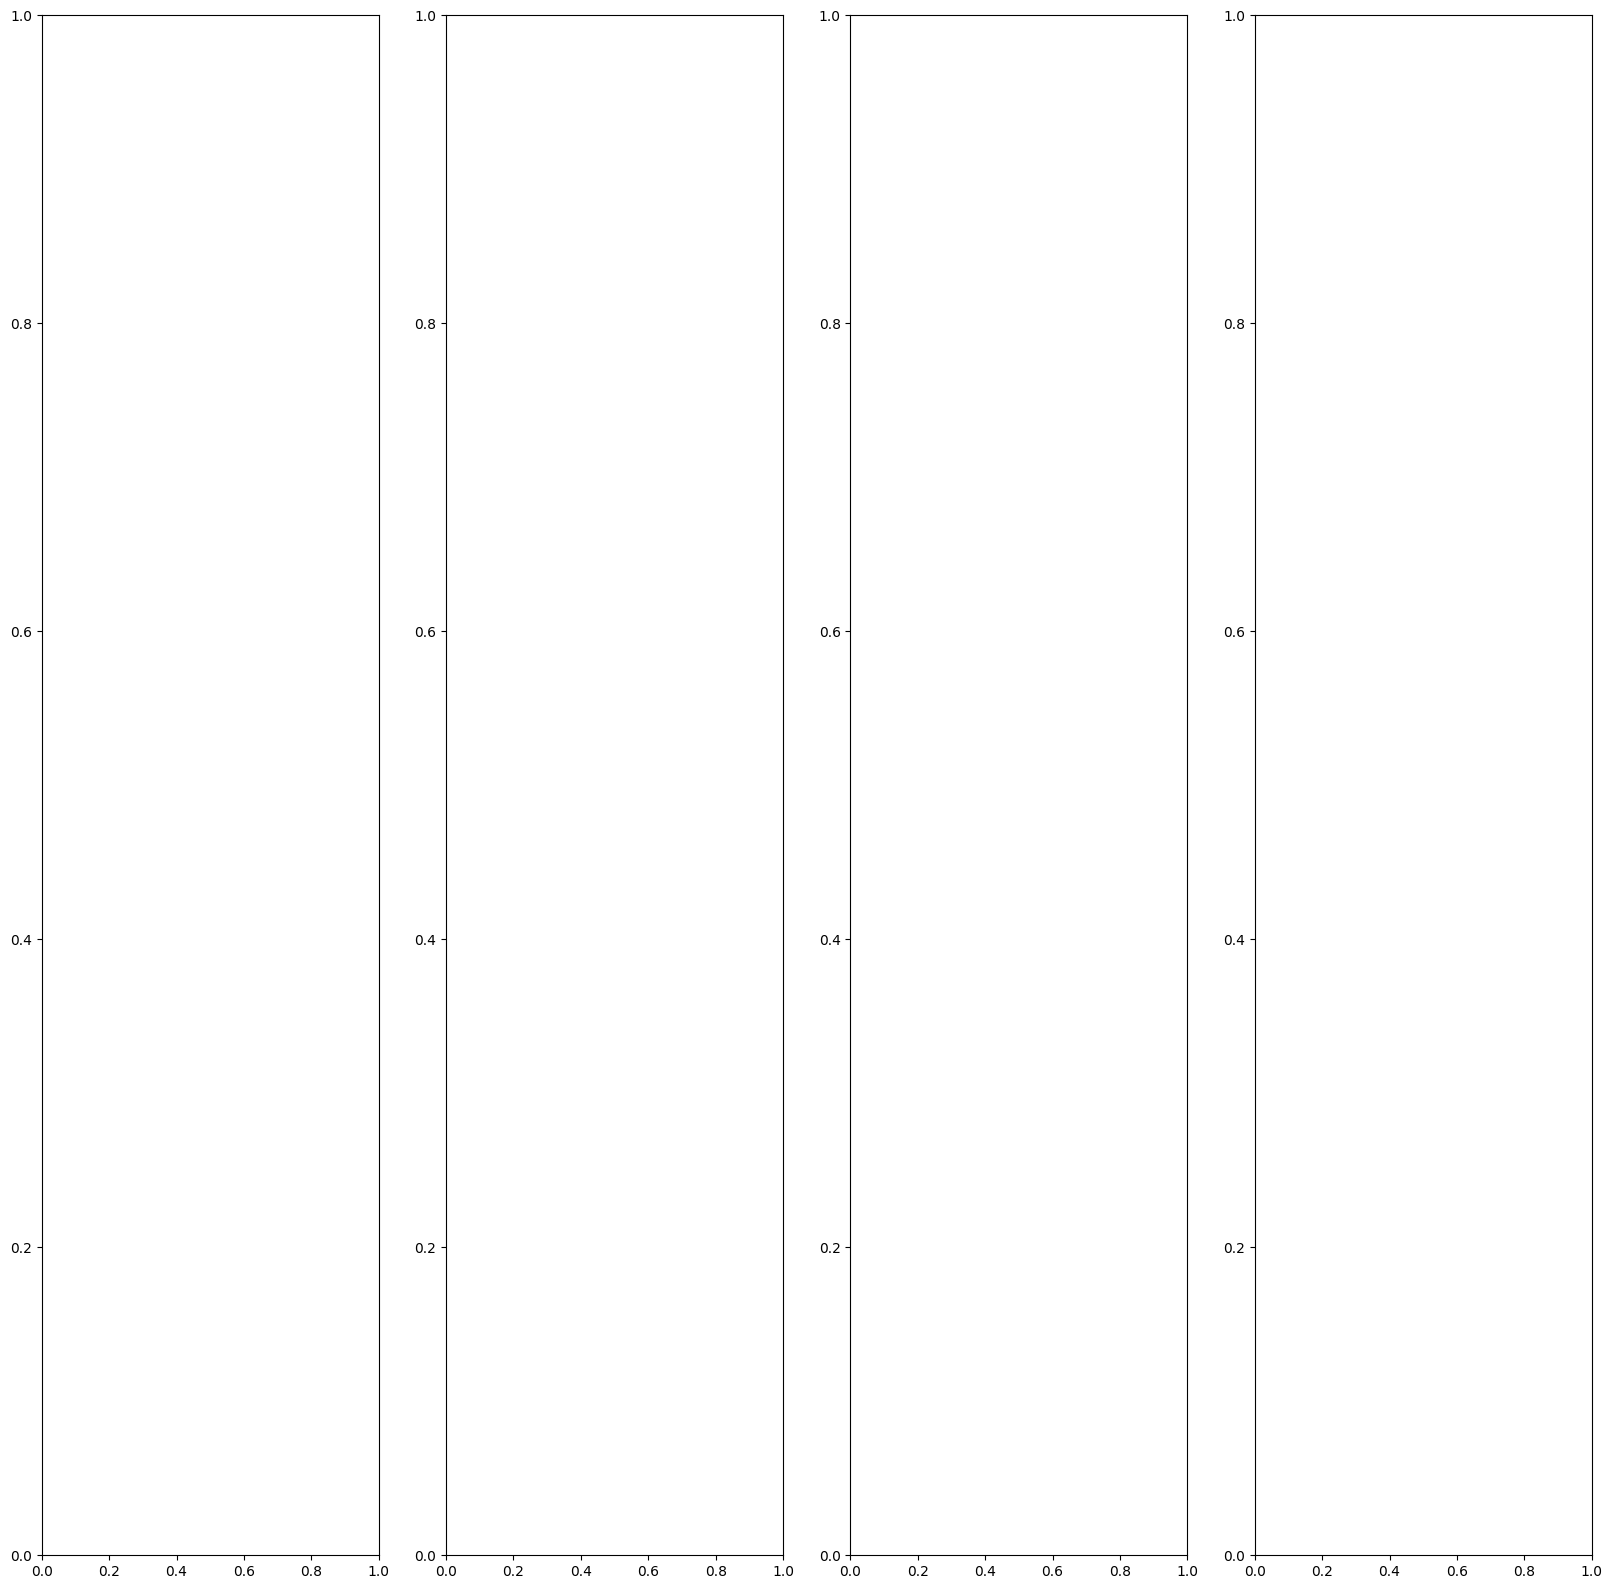

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [115]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('/Users/tadiostilahun/visoal studio/data003', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('/Users/tadiostilahun/visoal studio/data003', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('/Users/tadiostilahun/visoal studio/data003', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [116]:
import albumentations as alb

In [117]:
pip install -U albumentations


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [118]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(0.2), 
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

In [15]:
91*.7, 91*.15, 91*.15

(63.699999999999996, 13.65, 13.65)

In [119]:
img = cv2.imread(os.path.join('/Users/tadiostilahun/visoal studio/data003', 'train', 'images', 'b8e4b090-8cbc-11ef-af2b-1225dcae3128.jpg'))

In [120]:
with open(os.path.join('/Users/tadiostilahun/visoal studio/data003', 'train', 'labels', 'b8e4b090-8cbc-11ef-af2b-1225dcae3128.json'), 'r') as f:
    label = json.load(f)

In [121]:
label

{'version': '5.5.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[350.9090909090909, 130.9090909090909],
    [703.1818181818181, 604.7727272727273]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '../images/b8e4b090-8cbc-11ef-af2b-1225dcae3128.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQ4B4ADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRC

In [122]:
label['shapes'][0]['points']

[[350.9090909090909, 130.9090909090909],
 [703.1818181818181, 604.7727272727273]]

In [123]:
coords =[0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [124]:
coords

[350.9090909090909, 130.9090909090909, 703.1818181818181, 604.7727272727273]

In [125]:
coords = list(np.divide(coords, [1920, 1080, 1920, 1080]))

In [126]:
coords

[0.1827651515151515,
 0.12121212121212122,
 0.3662405303030303,
 0.5599747474747474]

In [127]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

/Users/tadiostilahun/visoal studio/deep_learning_enviroment/lib/python3.12/site-packages/albumentations/core/bbox_utils.py:478: RuntimeWarning: invalid value encountered in divide
  & (clipped_box_areas / denormalized_box_areas >= min_visibility - epsilon)


In [128]:
augmented

{'image': array([[[163, 186, 235],
         [161, 184, 233],
         [160, 183, 232],
         ...,
         [111, 109,  90],
         [113, 110,  91],
         [110, 110,  91]],
 
        [[163, 186, 235],
         [161, 184, 233],
         [161, 184, 233],
         ...,
         [111, 109,  90],
         [111, 109,  90],
         [108, 108,  88]],
 
        [[162, 185, 234],
         [161, 184, 233],
         [160, 183, 232],
         ...,
         [109, 107,  87],
         [110, 108,  88],
         [110, 108,  88]],
 
        ...,
 
        [[ 81,  90,  97],
         [ 84,  93, 101],
         [ 82,  90,  99],
         ...,
         [120, 116, 115],
         [120, 116, 115],
         [121, 117, 116]],
 
        [[ 79,  90,  97],
         [ 79,  88,  98],
         [ 81,  91, 102],
         ...,
         [118, 114, 113],
         [119, 115, 114],
         [120, 116, 115]],
 
        [[ 76,  86,  96],
         [ 79,  90, 101],
         [ 80,  91, 102],
         ...,
         [121, 117,

In [129]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                    (250,0,0), 2)
plt.imshow(augmented['image'])

IndexError: list index out of range

In [21]:
# for partition in['train', 'test', 'val']:
#     for image in os.listdir(os.path.join('/Users/tadiostilahun/visoal studio/data003', partition, 'images')):
#         img = cv2.imread(os.path.join('/Users/tadiostilahun/visoal studio/data003', partition, 'images', image))

#         coords = [0,0,0.00001,0.00001]
#         label_path = os.path.join('/Users/tadiostilahun/visoal studio/data003', partition, 'labels', f'{image.split(".")[0]}.json')
#         if os.path.exists(label_path):
#             with open(label_path, 'r') as f:
#                 label = json.load(f)
            
#             coords[0] = label['shapes'][0]['points'][0][0]
#             coords[1] = label['shapes'][0]['points'][0][1]
#             coords[2] = label['shapes'][0]['points'][1][0]
#             coords[3] = label['shapes'][0]['points'][1][1]
#             coords = list(np.divide(coords, [1920, 1080, 1920, 1080]))
#         try:
#             for x in range(60):
#                 augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
#                 cv2.imwrite(os.path.join('/Users/tadiostilahun/visoal studio/data003/aug_data', partition, 'images',f'{image.split('.')[0]}.{x}.jpg'), augmented['image'])

#                 annotation = {}
#                 annotation['image'] = image

#                 if os.path.exists(label_path):
#                     if len(augmented['bboxes']) == 0:
#                         annotation['bbox'] = [0,0,0,0]
#                         annotation['class'] = 0
#                     else:
#                         annotation['bbox'] = augmented['bboxes'][0]
#                         annotation['class'] = 1
#                 else:
#                     annotation['bbox'] = [0,0,0,0]
#                     annotation['class'] = 0

#                 with open(os.path.join('/Users/tadiostilahun/visoal studio/data003/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
#                     json.dump(annotation, f)

#         except Exception as e:
#             print(e)

In [22]:
train_images = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data003/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [23]:
test_images = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data003/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [24]:
val_images = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data003/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [25]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding= "utf-8") as f:
        label = json.load(f)

        return [label['class']], label['bbox']

In [26]:
train_labels = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data003/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [27]:
test_labels = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data003/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [28]:
val_labels = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data003/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [29]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3540, 3540, 780, 780, 780, 780)

In [30]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [31]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [32]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [33]:
data_samples = train.as_numpy_iterator()

In [34]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


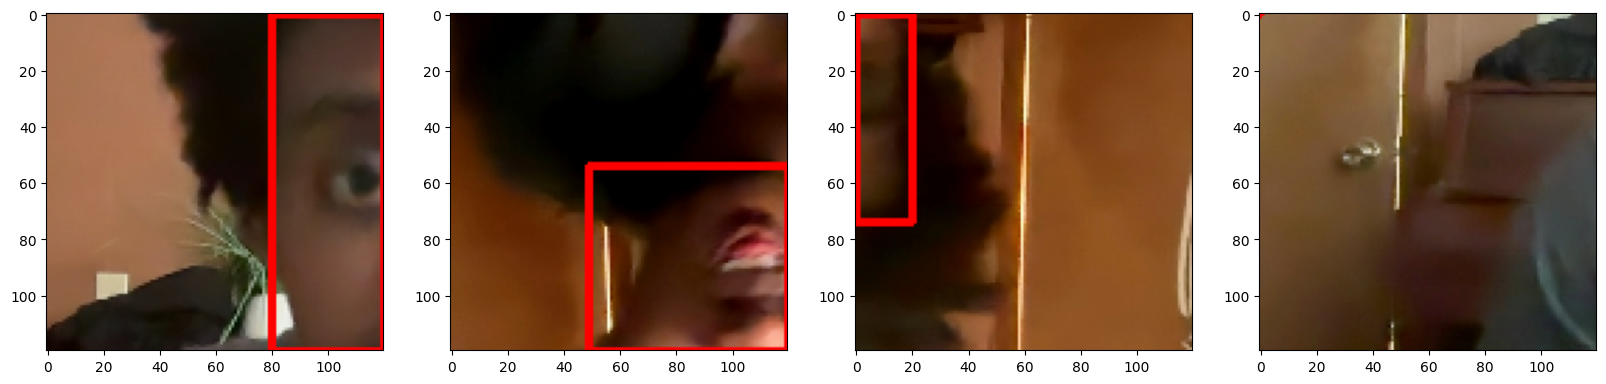

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx].copy()
    sample_coords =res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [37]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [38]:
vgg = VGG16(include_top=False)

In [39]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)


    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [41]:
facetracker = build_model()

In [42]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
x,y = train.as_numpy_iterator().next()

In [44]:
x.shape

(8, 120, 120, 3)

In [45]:
classes, coords = facetracker.predict(x) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


In [46]:
classes, coords

(array([[0.48060483],
        [0.38864568],
        [0.45021716],
        [0.50030255],
        [0.4065353 ],
        [0.4501882 ],
        [0.43462962],
        [0.47814712]], dtype=float32),
 array([[0.58451605, 0.6375632 , 0.48188305, 0.32035118],
        [0.6485778 , 0.8417808 , 0.5796533 , 0.3744435 ],
        [0.60530776, 0.68182254, 0.4380707 , 0.31488863],
        [0.64415836, 0.6267232 , 0.5058498 , 0.24616848],
        [0.625171  , 0.7536226 , 0.55310446, 0.28257945],
        [0.58728176, 0.6919469 , 0.5964831 , 0.33683985],
        [0.60120845, 0.5579412 , 0.4752799 , 0.36179635],
        [0.6303831 , 0.67397684, 0.55688584, 0.27625716]], dtype=float32))

In [47]:
batches_per_epoch = len(train)
Ir_decay = (1./0.75 -1)/batches_per_epoch

In [48]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=Ir_decay)

/Users/tadiostilahun/visoal studio/deep_learning_enviroment/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [49]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [50]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [51]:
localization_loss(y[1], coords).numpy()

9.612003

In [52]:
classloss(y[0], classes).numpy()

0.64460635

In [53]:
regressloss(y[1], coords).numpy()

9.612003

In [54]:
from tensorflow import GradientTape as g

In [55]:
g

tensorflow.python.eager.backprop.GradientTape

In [56]:
class FaceTracker(Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        x, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(x, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss*0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regressloss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs):
        x, y = batch

        classes, coords = self.model(x, training=False)

        batch_classloss =self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_classloss + batch_localizationloss * 0.5

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def call(self, x, **kwargs):
        return self.model(x, **kwargs)


    def call(self, x, **kwargs):
        return self.model(x, **kwargs)

In [57]:
model = FaceTracker(facetracker)

In [58]:
model.compile(opt, classloss, regressloss, run_eagerly=True)

In [59]:
logdir = '/Users/tadiostilahun/visoal studio/data003/log002'

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [63]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
443/443 ━━━━━━━━━━━━━━━━━━━━ 1014s 2s/step - class_loss: 0.1042 - regressloss: 0.5639 - total_loss: 0.0431 - val_class_loss: 0.0877 - val_regress_loss: 0.0619 - val_total_loss: 0.1186
Epoch 2/40
443/443 ━━━━━━━━━━━━━━━━━━━━ 904s 2s/step - class_loss: 0.1070 - regressloss: 0.4582 - total_loss: 0.0379 - val_class_loss: 0.0257 - val_regress_loss: 0.0801 - val_total_loss: 0.0658
Epoch 3/40
443/443 ━━━━━━━━━━━━━━━━━━━━ 848s 2s/step - class_loss: 0.0673 - regressloss: 0.3366 - total_loss: 0.0175 - val_class_loss: 5.8446e-04 - val_regress_loss: 0.1209 - val_total_loss: 0.0610
Epoch 4/40
443/443 ━━━━━━━━━━━━━━━━━━━━ 1993s 5s/step - class_loss: 0.0326 - regressloss: 0.2702 - total_loss: 0.0063 - val_class_loss: 0.8334 - val_regress_loss: 0.1983 - val_total_loss: 0.9326
Epoch 5/40
443/443 ━━━━━━━━━━━━━━━━━━━━ 998s 2s/step - class_loss: 0.0668 - regressloss: 0.4131 - total_loss: 0.0241 - val_class_loss: 0.2314 - val_regress_loss: 0.1416 - val_total_loss: 0.3022
Epoch 6/40
443/443 ━━━━━

In [64]:
hist.history

{'class_loss': [0.05801401659846306,
  0.09828728437423706,
  0.010857956483960152,
  0.0404786691069603,
  0.10505170375108719,
  0.024551838636398315,
  0.0037293536588549614,
  0.46189504861831665,
  0.017587874084711075,
  0.005815260112285614,
  0.00042048952309414744,
  5.173776298761368e-05,
  0.29132163524627686,
  0.0009859255515038967,
  0.0003964647767134011,
  8.267234079539776e-05,
  0.0007909164996817708,
  0.007308522239327431,
  0.0010498412884771824,
  0.00012277845235075802,
  5.137697371537797e-06,
  0.0011824232060462236,
  0.04860083758831024,
  0.0007057394832372665,
  0.10870934277772903,
  0.001404677052050829,
  0.001497495686635375,
  0.022587964311242104,
  7.76209981268039e-06,
  2.9490914243979205e-07,
  9.721508831717074e-06,
  1.7652961332714767e-06,
  5.01807221553463e-07,
  3.5215813909417193e-07,
  9.89878472523742e-08,
  2.4760891254027584e-11,
  5.741277391280164e-07,
  7.843474918445281e-07,
  1.1168208402523305e-05,
  7.003774449287903e-09],
 'regr

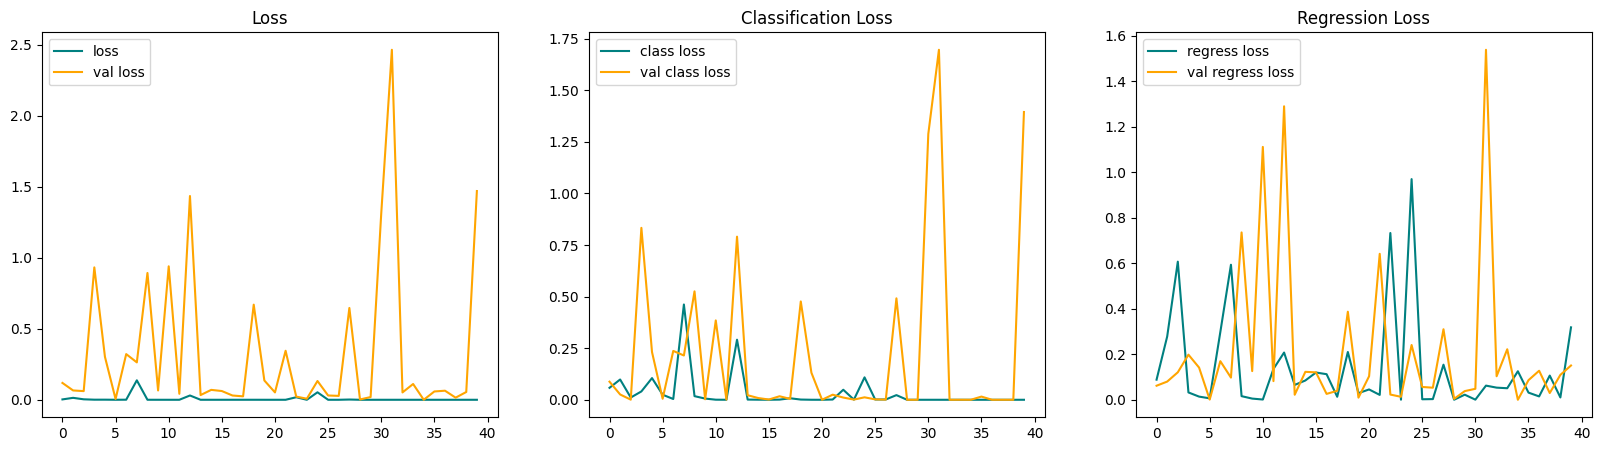

In [67]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regressloss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [203]:
test_data = test.as_numpy_iterator()

In [204]:
test_sample = test_data.next()

In [205]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


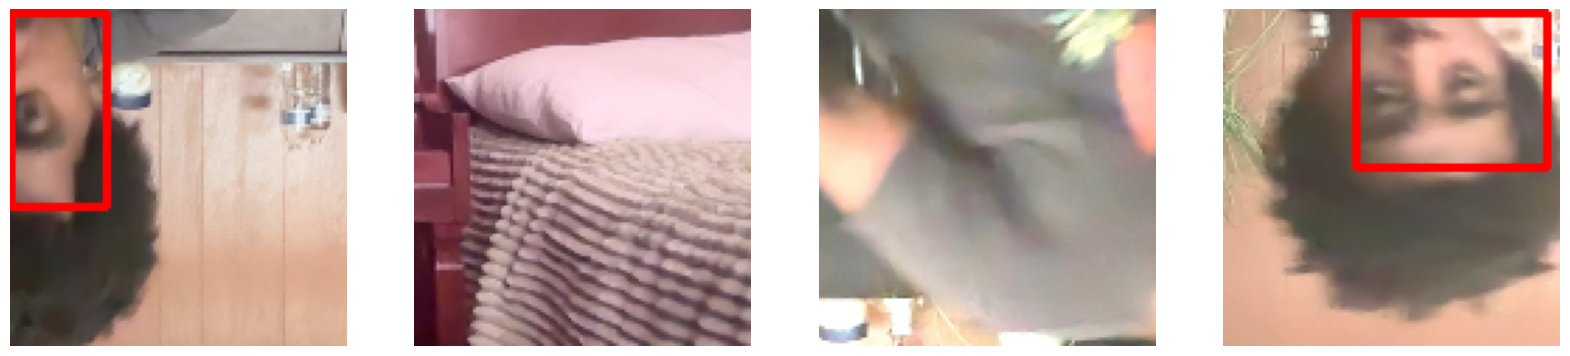

In [206]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image0 = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image0, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image0)
    ax[idx].axis('off')


In [208]:
from tensorflow.keras.models import load_model

In [209]:
facetracker.save('facetracker.h5')

In [221]:
cap = cv2.VideoCapture(0)

cv2.namedWindow('EyeTrack', cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty('EyeTrack', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

while cap.isOpened():
    _, frame = cap.read()
    

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [frame.shape[1], frame.shape[0]]).astype(int)),
                            (255,0,0), 2)
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int),
                                [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int),
                                [80,0])),
                            (255,0,0), -1)
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int),
                                                [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━